# Eddy CIOPS Quantitative Runs

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import datetime as dt
import math

In [2]:
# round to 2 sig fig
def round_to_2(x):
    return np.round(x, -int(math.floor(math.log10(abs(x))))+1)

def round_to_3(x):
    return np.round(x, -int(math.floor(math.log10(abs(x))))+2)

In [3]:
meander = 0
init = 1
Eddy = 3
Canyon = 4
South = 2
# sections = [Eddy, Canyon, South]
# sec_name = ['eddy', 'canyon', 'south']

## summer 2017

In [6]:
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_eddybdy_30sep17/ariane_positions_quantitative.nc')

In [7]:
# init_t 3601 refers to the first hour of day 150 = 2017/04/01
# init_t 7992 refers to the last hour of day 333 = 2017/09/30
# the run itself starts on 7992

monS = ['apr', 'may', 'jun', 'jul', 'aug', 'sep']
mon_len = [30, 31, 30, 31, 31, 30]
h = 3601
sum_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
sum_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

In [8]:
mon_sum = [np.sum(data.final_transp[(data.final_section!=0) & (np.isnan(data.final_section)==False) & (data.init_t >= sum_start[i]) & (data.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1) for i in range(len(sum_start))]

In [9]:
eddy = [np.sum(data.final_transp[(data.final_section==Eddy) & (data.init_t >= sum_start[i]) & (data.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1)/mon_sum[i] for i in range(len(sum_start))]
canyon = [np.sum(data.final_transp[(data.final_section==Canyon) & (data.init_t >= sum_start[i]) & (data.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1)/mon_sum[i] for i in range(len(sum_start))]
south = [np.sum(data.final_transp[(data.final_section==South) & (data.init_t >= sum_start[i]) & (data.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1)/mon_sum[i] for i in range(len(sum_start))]

In [24]:
# canyon in mSv
np.mean(np.array(canyon[2:])*mon_sum[2:]/1000)/0.8-np.mean(np.array(canyon[2:])*mon_sum[2:]/1000)
#how much flow missing if this is 80%

2.6008131947873068

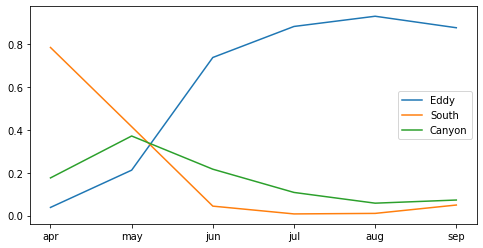

In [9]:
fig, ax = plt.subplots(1,1,figsize=(8,4))

ax.plot(monS, eddy, label = "Eddy")
ax.plot(monS, south, label = "South")
ax.plot(monS, canyon, label = "Canyon")
# ax.plot(monS, offshore, label='Offshore')
ax.legend()

In [14]:
total = np.sum(mon_sum[2:])

canyon_bar = np.sum([canyon[2]*mon_sum[2]/total*100, canyon[3]*mon_sum[3]/total*100, canyon[4]*mon_sum[4]/total*100, canyon[5]*mon_sum[5]/total*100])
south_bar = np.sum([south[2]*mon_sum[2]/total*100, south[3]*mon_sum[3]/total*100, south[4]*mon_sum[4]/total*100, south[5]*mon_sum[5]/total*100]) 
eddy_bar = np.sum([eddy[2]*mon_sum[2]/total*100, eddy[3]*mon_sum[3]/total*100, eddy[4]*mon_sum[4]/total*100, eddy[5]*mon_sum[5]/total*100]) 

Text(0, 0.5, 'Percentage of JdF Inflow')

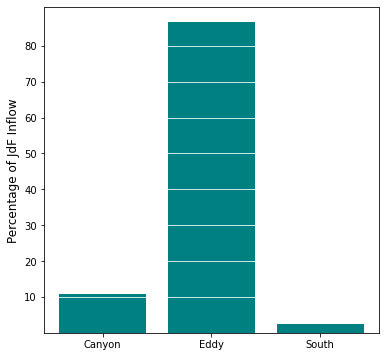

In [15]:
#bar plot of contribution for june, july, august, september
fig, ax = plt.subplots(1,1,figsize=(6,6))
sec_name = ['Canyon', 'Eddy', 'South']
colors = ['teal',  'teal',  'teal']
ax.bar(sec_name,[canyon_bar,eddy_bar, south_bar], color=colors)
ax.yaxis.set_ticks([10,20,30,40,50,60,70,80])
ax.grid(axis = 'y', color='white')
ax.set_ylabel('Percentage of JdF Inflow', fontsize=12)

In [23]:
canyon_bar, eddy_bar, south_bar # fuuuuuun this is almost exactly equal to the percentage of water that is CUC! 

(10.834549464940123, 86.6082655218175, 2.5571850132423766)

## winter 2016/17

In [25]:
dataS= xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_eddybdy_30sep17/ariane_positions_quantitative.nc')
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_eddybdy_31mar17/ariane_positions_quantitative.nc')

In [26]:
# init_t 3601 refers to the first hour of day 150 = 2017/04/01
# init_t 7992 refers to the last hour of day 333 = 2017/09/30
# the run itself starts on 7992

mon16 = ['oct16', 'nov16', 'dec16', 'jan17', 'feb17', 'mar17']
mon_len = [31, 30, 31, 31, 28, 31]
h = 3601
win_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
win_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

In [27]:
apr_may = mon_sum[:2]

mon_sum = np.append([np.sum(data.final_transp[(data.final_section!=0) & (np.isnan(data.final_section)==False) & (data.init_t >= win_start[i]) & (data.init_t <= win_end[i])])/(win_end[i]-win_start[i]+1) for i in range(len(win_start))],
                    apr_may)

In [28]:
mons = np.append(mon16, ['apr17', 'may17'])
saltdiv = 32


canyon = np.append([np.sum(data.final_transp[(data.final_section==Canyon) & (data.init_t >= win_start[i]) & (data.init_t <= win_end[i])])/(win_end[i]-win_start[i]+1)/mon_sum[i] for i in range(len(win_start))],
                [np.sum(dataS.final_transp[(dataS.final_section==Canyon) & (dataS.init_t >= sum_start[i]) & (dataS.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1)/mon_sum[i+6] for i in [0,1]])

south = np.append([np.sum(data.final_transp[(data.final_section==South) & (data.init_t >= win_start[i]) & (data.init_t <= win_end[i])])/(win_end[i]-win_start[i]+1)/mon_sum[i] for i in range(len(win_start))],
                  [np.sum(dataS.final_transp[(dataS.final_section==South) & (dataS.init_t >= sum_start[i]) & (dataS.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1)/mon_sum[i+6] for i in [0,1]])

eddy = np.append([np.sum(data.final_transp[(data.final_section==Eddy) & (data.init_t >= win_start[i]) & (data.init_t <= win_end[i])])/(win_end[i]-win_start[i]+1)/mon_sum[i] for i in range(len(win_start))],
                  [np.sum(dataS.final_transp[(dataS.final_section==Eddy) & (dataS.init_t >= sum_start[i]) & (dataS.init_t <= sum_end[i])])/(sum_end[i]-sum_start[i]+1)/mon_sum[i+6] for i in [0,1]])


In [29]:
# canyon in mSv
np.mean(np.array(canyon)*mon_sum/1000)/0.8-np.mean(np.array(canyon)*mon_sum/1000)
#how much flow missing if this is 80%

2.3611544204040342

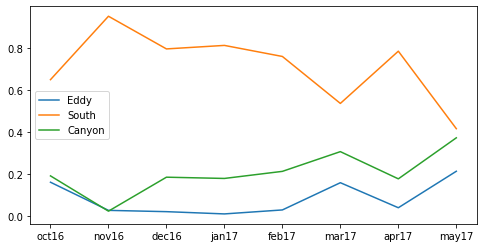

In [22]:
fig, ax = plt.subplots(1,1,figsize=(8,4))

ax.plot(mons, eddy, label = "Eddy")
ax.plot(mons, south, label = "South")
ax.plot(mons, canyon, label = "Canyon")
ax.legend()

Text(0, 0.5, 'Percentage of JdF Inflow')

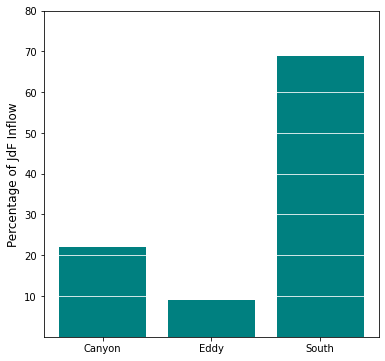

In [23]:
total = np.sum(mon_sum)

eddy_bar = np.sum([eddy[i]*mon_sum[i]/total*100 for i in range(len(eddy))])
south_bar = np.sum([south[i]*mon_sum[i]/total*100 for i in range(len(south))])
canyon_bar = np.sum([canyon[i]*mon_sum[i]/total*100 for i in range(len(canyon))])

#bar plot of contribution for june, july, august, september
fig, ax = plt.subplots(1,1,figsize=(6,6))
sec_name = ['Canyon', 'Eddy', 'South']
colors = ['teal',  'teal',  'teal']
ax.bar(sec_name,[canyon_bar,eddy_bar, south_bar], color=colors)
ax.yaxis.set_ticks([10,20,30,40,50,60,70,80])
ax.grid(axis = 'y', color='white')
ax.set_ylabel('Percentage of JdF Inflow', fontsize=12)

In [24]:
canyon_bar, eddy_bar, south_bar

(22.076040323333682, 9.03530718422629, 68.88865249244)

## winter 2017/18

In [30]:
data = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_eddybdy_31mar18/ariane_positions_quantitative.nc')

In [31]:
# init_t 3601 refers to the first hour of day 150 = 2017/04/01
# init_t 7992 refers to the last hour of day 333 = 2017/09/30
# the run itself starts on 7992

mon17 = ['oct', 'nov', 'dec', 'jan', 'feb', 'mar']
mon_len = [31, 30, 31, 31, 28, 31]
h = 3601
win_start = [h, h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24]
win_end = [h+sum(mon_len[:1])*24, h+sum(mon_len[:2])*24, h+sum(mon_len[:3])*24, h+sum(mon_len[:4])*24, h+sum(mon_len[:5])*24, h+sum(mon_len)*24-1]

In [32]:
mon_sum = [np.sum(data.final_transp[(data.final_section!=0) & (np.isnan(data.final_section)==False) & (data.init_t >= win_start[i]) & (data.init_t <= win_end[i])])/(win_end[i]-win_start[i]+1) for i in range(len(win_start))]

In [33]:
canyon = [np.sum(data.final_transp[(data.final_section==Canyon) & (data.init_t >= win_start[i]) & (data.init_t <= win_end[i])])/(win_end[i]-win_start[i]+1)/mon_sum[i] for i in range(len(win_start))]
south = [np.sum(data.final_transp[(data.final_section==South) & (data.init_t >= win_start[i]) & (data.init_t <= win_end[i])])/(win_end[i]-win_start[i]+1)/mon_sum[i] for i in range(len(win_start))]
eddy = [np.sum(data.final_transp[(data.final_section==Eddy) & (data.init_t >= win_start[i]) & (data.init_t <= win_end[i])])/(win_end[i]-win_start[i]+1)/mon_sum[i] for i in range(len(win_start))]

In [34]:
# canyon in mSv
np.mean(np.array(canyon)*mon_sum/1000)/0.8-np.mean(np.array(canyon)*mon_sum/1000)
#how much flow missing if this is 80%

2.9989520219810952

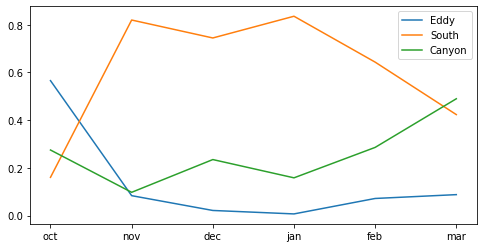

In [29]:
fig, ax = plt.subplots(1,1,figsize=(8,4))

ax.plot(mon17, eddy, label = "Eddy")
ax.plot(mon17, south, label = "South")
ax.plot(mon17, canyon, label = "Canyon")
ax.legend()

Text(0, 0.5, 'Percentage of JdF Inflow')

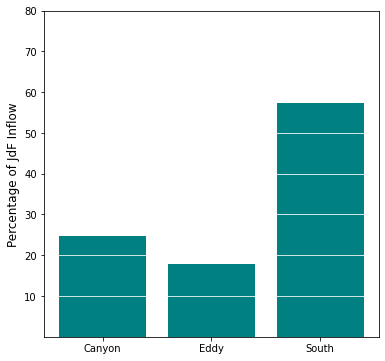

In [30]:
total = np.sum(mon_sum)

eddy_bar = np.sum([eddy[i]*mon_sum[i]/total*100 for i in range(len(eddy))])
south_bar = np.sum([south[i]*mon_sum[i]/total*100 for i in range(len(south))])
canyon_bar = np.sum([canyon[i]*mon_sum[i]/total*100 for i in range(len(canyon))])

#bar plot of contribution for june, july, august, september
fig, ax = plt.subplots(1,1,figsize=(6,6))
sec_name = ['Canyon', 'Eddy', 'South']
colors = ['teal',  'teal',  'teal']
ax.bar(sec_name,[canyon_bar,eddy_bar, south_bar], color=colors)
ax.yaxis.set_ticks([10,20,30,40,50,60,70,80])
ax.grid(axis = 'y', color='white')
ax.set_ylabel('Percentage of JdF Inflow', fontsize=12)

In [31]:
canyon_bar, eddy_bar, south_bar

(24.681021697384402, 17.89341389867191, 57.42556440394368)

## bringing it all together

In [32]:
mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_eddybdy_31mar17/ariane_positions_quantitative.nc')
h = 3601
start = [h+24*i for i in range(182)]

eddy16 = [np.sum(mydata.final_transp[(mydata.final_section==Eddy) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
south16 = [np.sum(mydata.final_transp[(mydata.final_section==South) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
canyon16 = [np.sum(mydata.final_transp[(mydata.final_section==Canyon) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
 

mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_eddybdy_30sep17/ariane_positions_quantitative.nc')
h = 3601
start = [h+24*i for i in range(183)]

eddyS = [np.sum(mydata.final_transp[(mydata.final_section==Eddy) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
southS = [np.sum(mydata.final_transp[(mydata.final_section==South) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
canyonS = [np.sum(mydata.final_transp[(mydata.final_section==Canyon) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
 
mydata = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/Ariane/CIOPS_BC12/back_eddybdy_31mar18/ariane_positions_quantitative.nc')
h = 3601
start = [h+24*i for i in range(182)]

eddy17 = [np.sum(mydata.final_transp[(mydata.final_section==Eddy) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
south17 = [np.sum(mydata.final_transp[(mydata.final_section==South) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]
canyon17 = [np.sum(mydata.final_transp[(mydata.final_section==Canyon) & (mydata.init_t >= start[i]) & (mydata.init_t <= start[i]+23)])/24 for i in range(len(start))]

eddy = np.append(np.append(eddy16, eddyS), eddy17)
south = np.append(np.append(south16, southS), south17)
canyon = np.append(np.append(canyon16, canyonS), canyon17)

In [33]:
dates = [dt.datetime(2016,10,1)+dt.timedelta(days=i) for i in range(len(eddy))]

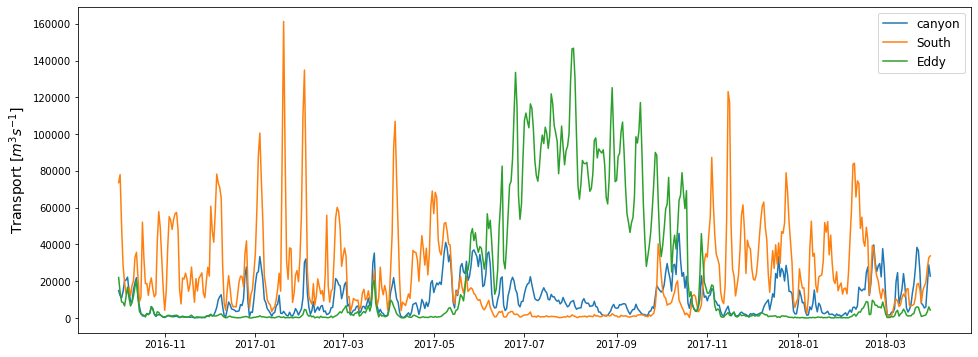

In [34]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
plt.rcParams['font.size'] = 12
ax.plot(dates, canyon, label = "canyon")
ax.plot(dates, south, label = "South")
ax.plot(dates, eddy, label = "Eddy")
ax.legend(loc='upper right')
ax.set_ylabel('Transport [$m^{3}s^{-1}$]',fontsize=14);
# ax.set_ylim([0,55000]);

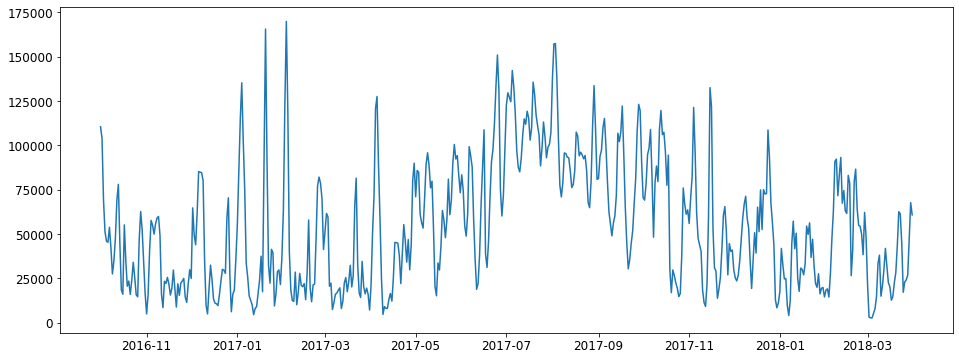

In [36]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
ax.plot(dates, np.sum([canyon,south,eddy],axis=0))
# ax.set_ylim([0,90000]);